# Case Study: The Effect of *Rolling AI* choice on Win Rate

Here we want to explore the effects of AI choice on the win rate for the different teams. We will be using the Clone Wars dataset for this.

In [1]:
import sys
# map path back to the directory above battlesim/
sys.path.insert(0,"../")
# our main import
import battlesim as bsm

from IPython.display import HTML
%matplotlib inline

## Defining Groups

Each battle will have the following AI choices:

1. All random
2. All nearest
3. All pack
4. All strongest
5. CIS random, Republic nearest
6. CIS nearest, Republic random
7. CIS pack, Republic random
8. CIS random, Republic pack

We will only affect the **rolling AI**, in all of the above cases we choose the *nearest AI* as an initial choice.

In this study, only clone troopers and battledroids will be used to eliminate unit effects.

#### Set up

In [5]:
bsm.simulation._target.get_function_names()

['random', 'nearest', 'close_weak']

In [7]:
group_name = ["all random", "all nearest","cis random, rep nearest", 
              "cis nearest, rep random", "cis close weak, rep random", "cis random, rep close weak"]

group_ai = [("random","random"),("nearest","nearest"),
            ("random","nearest"),("nearest","random"),("close_weak","random"),("random","close_weak")]

army_set = [("clone trooper", 75), ("b1 battledroid", 250)]
pos = [bsm.Distribution("gaussian",loc=0,scale=2), bsm.Distribution("gaussian",loc=10,scale=2)]

battles = [(bsm.Battle("../datasets/starwars-clonewars.csv")
               .create_army(army_set)
               .set_initial_ai(["nearest"]*2)
               .set_rolling_ai(ai_group)
               .apply_position(pos))
           for ai_group in group_ai]

## Run $k$ simulations for each battle group.

$k=50$ seems reasonable.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
k = 50
test_id = np.repeat(np.arange(len(group_name)),k)
# simulate
Test1 = [battle.simulate_k(k) for battle in battles]

In [10]:
Test_Results = pd.concat(Test1,axis=0).assign(Sim=test_id)

## Results:

As we can see, the choice of AI program drastically changes the result outcome distribution for given $k$, especially when the Republic and CIS have **different** AI choices.

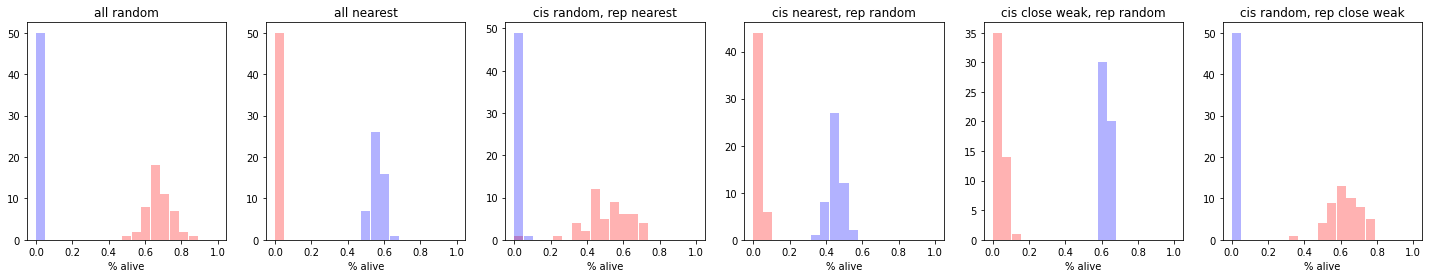

In [12]:
fig, ax = plt.subplots(ncols=len(group_name), figsize=(25,4))
nbins = 20
for a, name, id_t in zip(ax, group_name, np.arange(len(group_name))):
    xaxis = np.linspace(0,1,nbins)
    height_rep, _ = np.histogram(Test_Results.query("Sim==@id_t")["Republic"] / 75., bins=xaxis)
    height_cis, _ = np.histogram(Test_Results.query("Sim==@id_t")["CIS"] / 250., bins=xaxis)
    a.bar(xaxis[:-1],height_rep, color="red", alpha=.3, width=1./nbins, align="edge")
    a.bar(xaxis[:-1],height_cis, color="blue", alpha=.3, width=1./nbins, align="edge")
    a.set_xlabel("% alive")
    a.set_title(name)

In [72]:
bat = (bsm.Battle("../datasets/starwars-clonewars.csv")
               .create_army(army_set)
               .apply_position(pos))

In [78]:
bat.simulate()

array([[( 0, -0.914311  , -2.2830849e+00, 103, 35., 45.,  0.6498898 ,  0.7600284 , 0, 2),
        ( 0,  0.9416603 , -8.7148947e-01, 103, 35., 45.,  0.62641305,  0.7794913 , 0, 2),
        ( 0, -1.2437162 , -3.7277429e+00, 103, 35., 45.,  0.62302786,  0.78219974, 0, 2),
        ...,
        ( 0, 10.780783  ,  9.9841080e+00,  36, 20., 40., -0.7809694 , -0.62456924, 1, 1),
        ( 0, 10.11303   ,  1.0819047e+01,  36, 20., 40., -0.70871276, -0.7054971 , 1, 1),
        ( 0,  6.466221  ,  1.0051279e+01,  36, 20., 40., -0.4753999 , -0.87976986, 1, 1)],
       [( 1, -0.54582125, -1.8521461e+00, 103, 35., 45.,  0.6486874 ,  0.76105493, 0, 2),
        ( 1,  1.2940348 , -4.3300423e-01, 103, 35., 45.,  0.62447596,  0.781044  , 0, 2),
        ( 1, -0.88464135, -3.2769310e+00, 103, 35., 45.,  0.6213934 ,  0.78349864, 0, 2),
        ...,
        ( 1, 10.53189   ,  9.7850590e+00,  36, 20., 40., -0.78499657, -0.6195001 , 1, 1),
        ( 1,  9.882634  ,  1.0589696e+01,  36, 20., 40., -0.7086077 , -0.

In [79]:
%prun bat.simulate()

# Case Study: AI learning best strategies via RL

In [75]:
#!pip install gym
#!pip install pyglet

In [14]:
import gym

In [29]:
env = gym.make("CartPole-v1")
obs = env.reset()

for _ in range(10000):
    env.render()
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    
    if done:
        obs = env.reset()

env.close()

In [44]:
env = gym.make("MountainCar-v0")
print(env.action_space)
print(env.observation_space)

Discrete(3)
Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [59]:
gym.spaces.Box?

In [46]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)